In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(style="darkgrid")

In [3]:
csvs = ["113_2012-07-01_2020-02-01.csv", "114_2012-07-01_2020-02-01.csv",
       "115_2012-07-01_2020-02-01.csv", "116_2012-07-01_2020-02-01.csv"]
meals_all = (pd.read_csv(csv, parse_dates=["date"]) for csv in csvs)
meals = pd.concat(meals_all, ignore_index=True)

In [4]:
hot_meals = meals.groupby("name").filter(lambda x: len(x) > 45)
hot_meals = hot_meals.groupby(["name", "date", "price_student"])

hm = hot_meals.all()
hm.reset_index(inplace=True)

In [5]:
hm.groupby(["name", "date"]).filter(lambda x: len(x) > 2)

,name,date,price_student,mensa_id,meal_id,category,notes
91,Blumenkohl und Brokkoli überbacken mit Sauce H...,2019-11-01,3.25,True,True,True,True
92,Blumenkohl und Brokkoli überbacken mit Sauce H...,2019-11-01,3.35,True,True,True,True
93,Blumenkohl und Brokkoli überbacken mit Sauce H...,2019-11-01,3.40,True,True,True,True
977,Gebackenes Seelachsfilet mit Remouladensauce,2019-11-01,3.35,True,True,True,True
978,Gebackenes Seelachsfilet mit Remouladensauce,2019-11-01,3.55,True,True,True,True
979,Gebackenes Seelachsfilet mit Remouladensauce,2019-11-01,3.60,True,True,True,True
982,Gebackenes Seelachsfilet mit Remouladensauce,2020-01-24,3.35,True,True,True,True
983,Gebackenes Seelachsfilet mit Remouladensauce,2020-01-24,3.55,True,True,True,True
984,Gebackenes Seelachsfilet mit Remouladensauce,2020-01-24,3.60,True,True,True,True


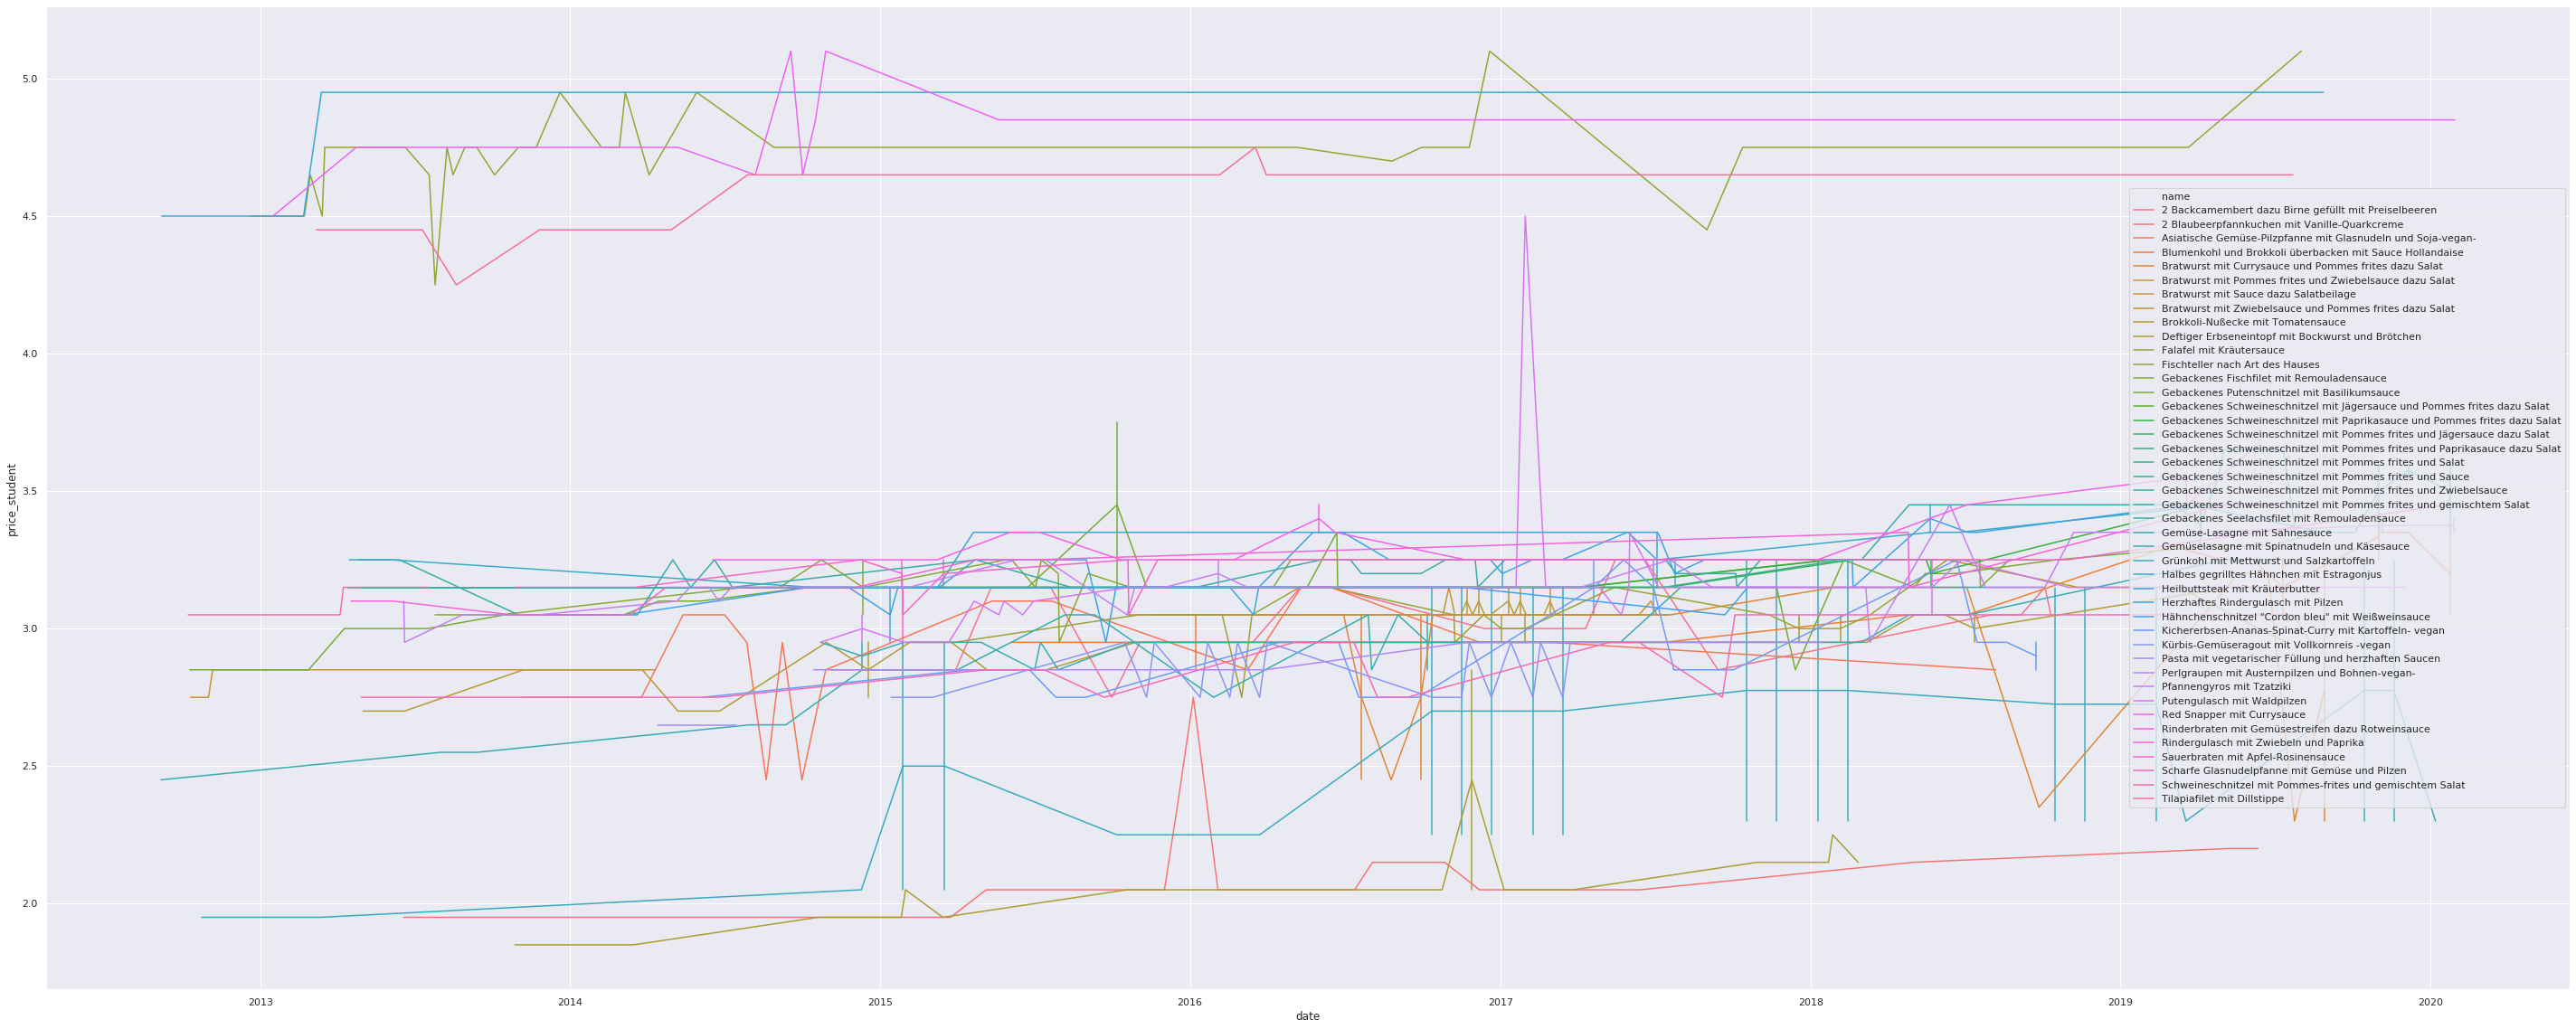

In [6]:
plt.figure(figsize=(50, 20))
sns.lineplot(x="date", y="price_student", hue="name", data=hm,
             err_style="bars", markers=True)